In [1]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import xarray as xr
import numpy as np
import pandas as pd
import calendar
import seaborn as sns
import seaborn_image as isns

In [2]:
import plotly.graph_objects as go
import plotly.express as px

In [3]:
import plotly.io as pio
pio.renderers.default='jupyterlab'

In [4]:
plt.style.use('seaborn-pastel')
isns.set_context(mode="notebook", fontfamily="Times")
sns.set_context(font_scale=0.8)

### pH against Alkalinity - Baseline

In [5]:
alk_baseline = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP3_7.0/Alk&DIC/DIC&ALK_Baseline_7.0_cropped.nc', decode_times=True).sel(deptht=slice(0, 150))

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/pyproj/__init__.py:89: UserWarning:

pyproj unable to set database path.



In [6]:
ph_baseline = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP3_7.0/pH/ph_baseline_7.0_cropped.nc')

In [7]:
ph_baseline = ph_baseline.ph[0,:]
ph_baseline = ph_baseline.to_dataset(name='ph')

In [8]:
alk_baseline = alk_baseline.where(alk_baseline)

In [9]:
start_date = "2090-01-01"
end_date = "2100-01-01"

alk_frame_baseline = alk_baseline.sel(time_counter=slice(start_date, end_date))
alk_frame_baseline = alk_frame_baseline.ALK.mean(dim=('y', 'x', 'deptht'))

In [10]:
start_date = "2090-01-01"
end_date = "2100-01-01"

ph_frame_baseline = ph_baseline.sel(time_counter=slice(start_date, end_date))
ph_frame_baseline = ph_frame_baseline.ph.mean(dim=('y', 'x'))

In [11]:
alk_frame_baseline = alk_frame_baseline.to_dataframe('ALK')
ph_frame_baseline = ph_frame_baseline.to_dataframe('ph')

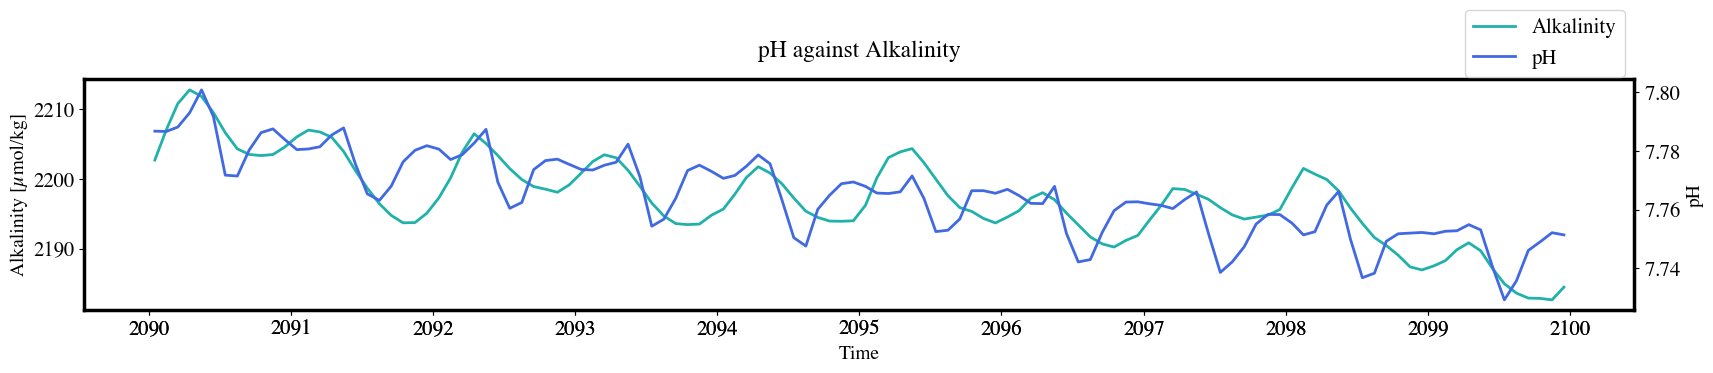

In [12]:
fig = plt.figure(figsize=(20, 3))
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)

ax.plot(alk_frame_baseline.index, alk_frame_baseline.ALK, linewidth=2, color="lightseagreen", label = 'Alkalinity')
ax.set_ylabel('Alkalinity [µmol/kg]', fontsize=14)

ax2.plot(ph_frame_baseline.index, ph_frame_baseline.ph, linewidth=2, color="royalblue", label = 'pH')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right') 
ax2.set_ylabel('pH', fontsize=14) 

plt.xlabel("Time", fontsize=14)

plt.title('pH against Alkalinity', fontname="Times", fontsize=17, y=1.06)
fig.legend(bbox_to_anchor=(0.81, 1), loc='center left')
plt.show()

### pH against Alkalinity - Baseline (annual average)

In [13]:
mean_ph_baseline = ph_frame_baseline.groupby(ph_frame_baseline.index.month).ph.mean()
mean_ph_baseline = mean_ph_baseline.reset_index()
mean_ph_baseline['time_counter'] = mean_ph_baseline['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_ph_baseline = mean_ph_baseline.set_index('time_counter')

In [14]:
mean_alk_baseline = alk_frame_baseline.groupby(alk_frame_baseline.index.month).ALK.mean()
mean_alk_baseline = mean_alk_baseline.reset_index()
mean_alk_baseline['time_counter']= mean_alk_baseline['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_alk_baseline = mean_alk_baseline.set_index('time_counter')

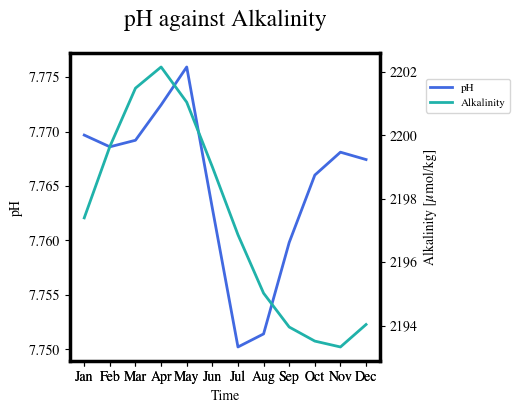

In [15]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)

ax.plot(mean_ph_baseline.index, mean_ph_baseline.ph, linewidth=2, color="royalblue", label = 'pH')
ax.set_ylabel('pH', fontsize=10)

ax2.plot(mean_alk_baseline.index, mean_alk_baseline.ALK, linewidth=2, color="lightseagreen", label = 'Alkalinity')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right') 
ax2.set_ylabel('Alkalinity [µmol/kg]', fontsize=10)

plt.xlabel("Time", fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=10)
ax2.tick_params(axis='both', which='major', labelsize=10)

plt.title('pH against Alkalinity', fontname="Times", fontsize=17, y=1.06)
fig.legend(bbox_to_anchor=(1, 0.83), loc='upper left', fontsize=8)
plt.show()

### pH against Alkalinity - OAE

In [16]:
alk_oae = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP3_7.0/Alk&DIC/DIC&ALK_OAE_7.0_cropped.nc', decode_times=True).sel(deptht=slice(0, 150))

In [17]:
ph_oae = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP3_7.0/pH/ph_OAE_7.0_cropped.nc')

In [18]:
ph_oae = ph_oae.ph[0,:]
ph_oae = ph_oae.to_dataset(name='ph')

In [19]:
alk_oae = alk_oae.where(alk_oae)

In [20]:
start_date = "2090-01-01"
end_date = "2100-01-01"

alk_frame_oae = alk_oae.sel(time_counter=slice(start_date, end_date))
alk_frame_oae = alk_frame_oae.ALK.mean(dim=('y', 'x', 'deptht'))

In [21]:
start_date = "2090-01-01"
end_date = "2100-01-01"

ph_frame_oae = ph_oae.sel(time_counter=slice(start_date, end_date))
ph_frame_oae = ph_frame_oae.ph.mean(dim=('y', 'x'))

In [22]:
alk_frame_oae = alk_frame_oae.to_dataframe('ALK')
ph_frame_oae = ph_frame_oae.to_dataframe('ph')

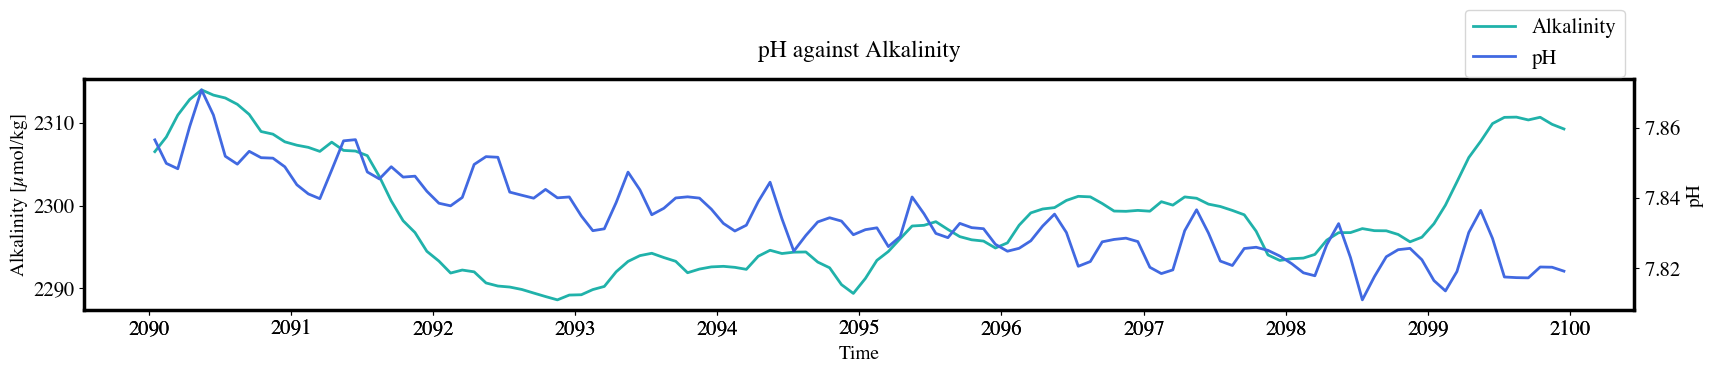

In [23]:
fig = plt.figure(figsize=(20, 3))
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)

ax.plot(alk_frame_oae.index, alk_frame_oae.ALK, linewidth=2, color="lightseagreen", label = 'Alkalinity')
ax.set_ylabel('Alkalinity [µmol/kg]', fontsize=14)

ax2.plot(ph_frame_oae.index, ph_frame_oae.ph, linewidth=2, color="royalblue", label = 'pH')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right') 
ax2.set_ylabel('pH', fontsize=14) 

plt.xlabel("Time", fontsize=14)

plt.title('pH against Alkalinity', fontname="Times", fontsize=17, y=1.06)
fig.legend(bbox_to_anchor=(0.81, 1), loc='center left')
plt.show()

### pH against Alkalinity - OAE (annual average)

In [24]:
mean_ph_oae = ph_frame_oae.groupby(ph_frame_oae.index.month).ph.mean()
mean_ph_oae = mean_ph_oae.reset_index()
mean_ph_oae['time_counter'] = mean_ph_oae['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_ph_oae = mean_ph_oae.set_index('time_counter')

In [25]:
mean_alk_oae = alk_frame_oae.groupby(alk_frame_oae.index.month).ALK.mean()
mean_alk_oae = mean_alk_oae.reset_index()
mean_alk_oae['time_counter']= mean_alk_oae['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_alk_oae = mean_alk_oae.set_index('time_counter')

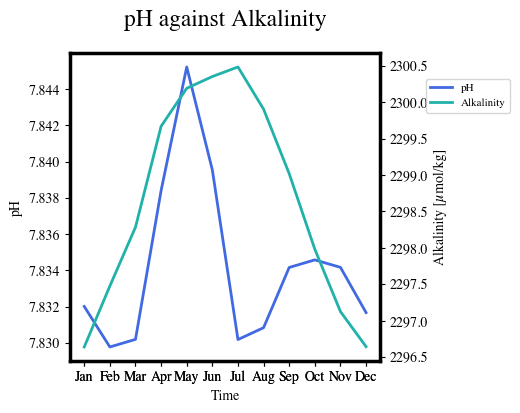

In [26]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)

ax.plot(mean_ph_oae.index, mean_ph_oae.ph, linewidth=2, color="royalblue", label = 'pH')
ax.set_ylabel('pH', fontsize=10)

ax2.plot(mean_alk_oae.index, mean_alk_oae.ALK, linewidth=2, color="lightseagreen", label = 'Alkalinity')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right') 
ax2.set_ylabel('Alkalinity [µmol/kg]', fontsize=10)

plt.xlabel("Time", fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=10)
ax2.tick_params(axis='both', which='major', labelsize=10)

plt.title('pH against Alkalinity', fontname="Times", fontsize=17, y=1.06)
fig.legend(bbox_to_anchor=(1, 0.83), loc='upper left', fontsize=8)
plt.show()

### pH against CO2 Flux - Baseline

In [27]:
co2flux_baseline = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP3_7.0/CO2flux/CO2flux_Baseline_7.0_cropped.nc')

In [28]:
co2flux_baseline = co2flux_baseline.co2flux[0,:]
co2flux_baseline = co2flux_baseline.to_dataset(name='co2flux')

In [29]:
co2flux_baseline = co2flux_baseline.co2flux * 31536000
co2flux_baseline = co2flux_baseline / 0.04401 # mol/m2/yr CO2

In [30]:
co2flux_baseline = co2flux_baseline.to_dataset(name='co2flux')

In [31]:
start_date = "2090-01-01"
end_date = "2100-01-01"

co2flux_frame_baseline = co2flux_baseline.sel(time_counter=slice(start_date, end_date))
co2flux_frame_baseline = co2flux_frame_baseline.co2flux.mean(dim=('y', 'x'))

In [32]:
co2flux_frame_baseline = co2flux_frame_baseline.to_dataframe('co2flux')

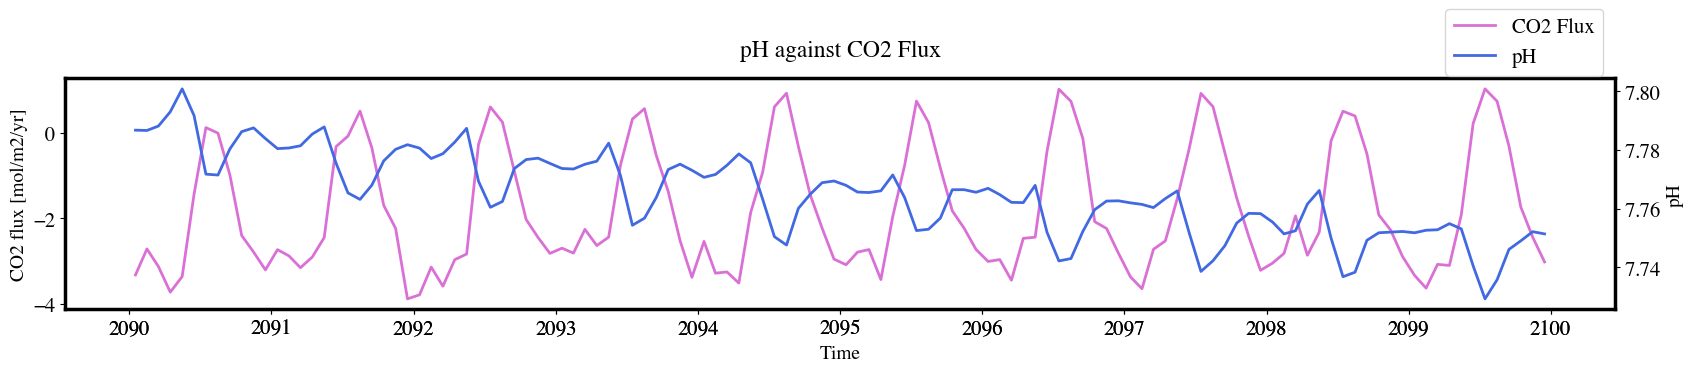

In [33]:
fig = plt.figure(figsize=(20, 3))
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)

ax.plot(co2flux_frame_baseline.index, co2flux_frame_baseline.co2flux, linewidth=2, color="orchid", label = 'CO2 Flux')
ax.set_ylabel('CO2 flux [mol/m2/yr]', fontsize=14)

ax2.plot(ph_frame_baseline.index, ph_frame_baseline.ph, linewidth=2, color="royalblue", label = 'pH')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right') 
ax2.set_ylabel('pH', fontsize=14) 

plt.xlabel("Time", fontsize=14)

plt.title('pH against CO2 Flux', fontname="Times", fontsize=17, y=1.06)
fig.legend(bbox_to_anchor=(0.81, 1), loc='center left')
plt.show()

### pH against CO2 flux - Baseline (annual average)

In [34]:
mean_co2flux_baseline = co2flux_frame_baseline.groupby(co2flux_frame_baseline.index.month).co2flux.mean()
mean_co2flux_baseline = mean_co2flux_baseline.reset_index()
mean_co2flux_baseline['time_counter']= mean_co2flux_baseline['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_co2flux_baseline = mean_co2flux_baseline.set_index('time_counter')

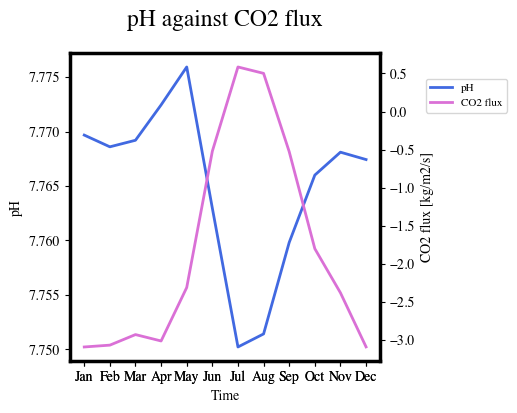

In [35]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)

ax.plot(mean_ph_baseline.index, mean_ph_baseline.ph, linewidth=2, color="royalblue", label = 'pH')
ax.set_ylabel('pH', fontsize=10)

ax2.plot(mean_co2flux_baseline.index, mean_co2flux_baseline.co2flux, linewidth=2, color="orchid", label = 'CO2 flux')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right') 
ax2.set_ylabel('CO2 flux [kg/m2/s]', fontsize=10)

plt.xlabel("Time", fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=10)
ax2.tick_params(axis='both', which='major', labelsize=10)

plt.title('pH against CO2 flux', fontname="Times", fontsize=17, y=1.06)
fig.legend(bbox_to_anchor=(1, 0.83), loc='upper left', fontsize=8)
plt.show()

### pH against CO2 Flux - OAE

In [36]:
co2flux_oae = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP3_7.0/CO2flux/CO2flux_OAE_7.0_cropped.nc')

In [37]:
co2flux_oae = co2flux_oae.co2flux[0,:]
co2flux_oae = co2flux_oae.to_dataset(name='co2flux')

In [38]:
co2flux_oae = co2flux_oae.co2flux * 31536000
co2flux_oae = co2flux_oae / 0.04401 # mol/m2/yr CO2

In [39]:
co2flux_oae = co2flux_oae.to_dataset(name='co2flux')

In [40]:
start_date = "2090-01-01"
end_date = "2100-01-01"

co2flux_frame_oae = co2flux_oae.sel(time_counter=slice(start_date, end_date))
co2flux_frame_oae = co2flux_frame_oae.co2flux.mean(dim=('y', 'x'))

In [41]:
co2flux_frame_oae = co2flux_frame_oae.to_dataframe('co2flux')

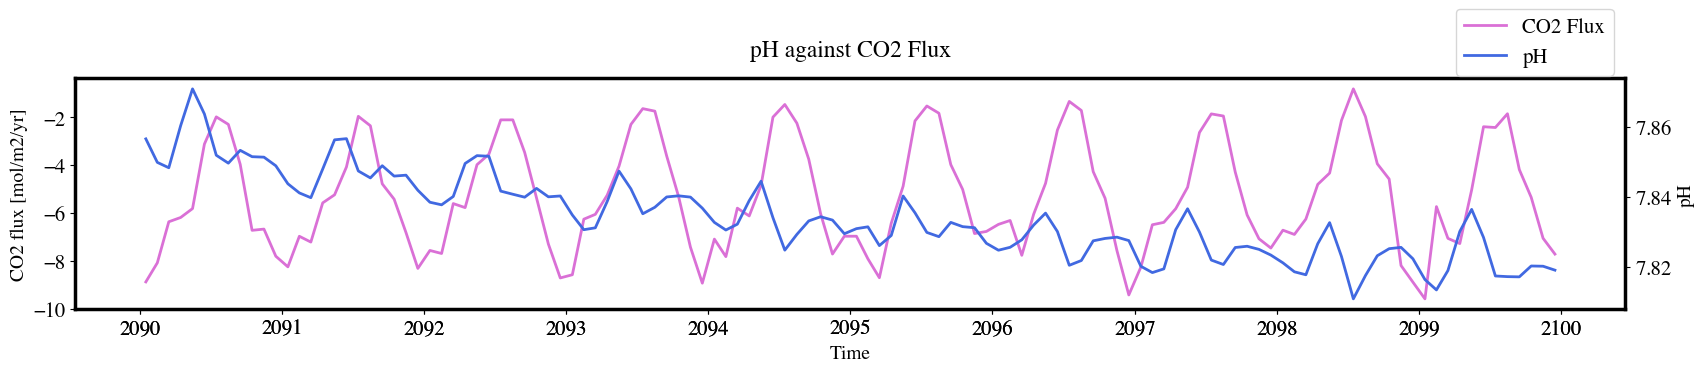

In [42]:
fig = plt.figure(figsize=(20, 3))
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)

ax.plot(co2flux_frame_oae.index, co2flux_frame_oae.co2flux, linewidth=2, color="orchid", label = 'CO2 Flux')
ax.set_ylabel('CO2 flux [mol/m2/yr]', fontsize=14)

ax2.plot(ph_frame_oae.index, ph_frame_oae.ph, linewidth=2, color="royalblue", label = 'pH')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right') 
ax2.set_ylabel('pH', fontsize=14) 

plt.xlabel("Time", fontsize=14)

plt.title('pH against CO2 Flux', fontname="Times", fontsize=17, y=1.06)
fig.legend(bbox_to_anchor=(0.81, 1), loc='center left')
plt.show()

### pH against CO2 flux - OAE (annual average)

In [43]:
mean_co2flux_oae = co2flux_frame_oae.groupby(co2flux_frame_oae.index.month).co2flux.mean()
mean_co2flux_oae = mean_co2flux_oae.reset_index()
mean_co2flux_oae['time_counter']= mean_co2flux_oae['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_co2flux_oae = mean_co2flux_oae.set_index('time_counter')

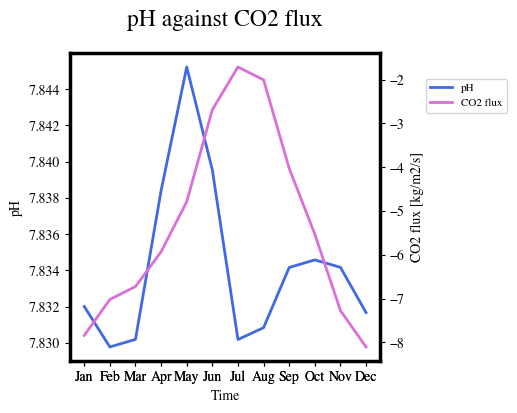

In [44]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)

ax.plot(mean_ph_oae.index, mean_ph_oae.ph, linewidth=2, color="royalblue", label = 'pH')
ax.set_ylabel('pH', fontsize=10)

ax2.plot(mean_co2flux_oae.index, mean_co2flux_oae.co2flux, linewidth=2, color="orchid", label = 'CO2 flux')
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right') 
ax2.set_ylabel('CO2 flux [kg/m2/s]', fontsize=10)

plt.xlabel("Time", fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=10)
ax2.tick_params(axis='both', which='major', labelsize=10)

plt.title('pH against CO2 flux', fontname="Times", fontsize=17, y=1.06)
fig.legend(bbox_to_anchor=(1, 0.83), loc='upper left', fontsize=8)
plt.show()